In [1]:
import numpy as np
from sympy import *
from pylab import *
import matplotlib.pyplot as plt
from IPython.display import display, Math
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 10

## Wave Equation :

## $\qquad\qquad\displaystyle\boxed{\frac{\partial u^2(x,t)}{\partial t^2}=\frac{\partial u^2(x,t)}{\partial x^2}}$

$\qquad\qquad\displaystyle\text{range }: 0\leq x\leq 1 \ , \quad t\geq 0$

$\qquad\qquad\text{Initial condition}\displaystyle \begin{equation*} = \left\{\begin{array}{rl} u(x,0)=f(x) \\ \frac{\partial u}{\partial t}(x,0)=g(x) \end{array}\right.\end{equation*}$
$\qquad\qquad\displaystyle \text{Boundary condition}\begin{equation*} = \left\{\begin{array}{rl} u(0,t)=A \\ u(a,t)=B \end{array}\right.\end{equation*}$

In [2]:
def wave_eqn(x,t,boundaryConditions,initialConditions):
    U=np.zeros((len(x),len(t)))
    U[0,:]=boundaryConditions[0]
    U[-1,:]=boundaryConditions[1]
    U[:, 0] = initialConditions
    #display(Math(r'U_{explicit} = '+latex(Matrix(U))))
    return U

$\displaystyle\frac{u^{j+1}_i−2u^{j}_i+u^{j−1}_i}{k^2}=c^2\frac{u^j_{i+1}−2u^j_i+u^j_{i−1}}{h^2} $

$\displaystyle\text{or},\qquad\qquad{u^{j+1}_i−2u^{j}_i+u^{j−1}_i}=\lambda^2({u^j_{i+1}−2u^j_i+u^j_{i−1})} \qquad\qquad\text{where},\lambda = \frac{ck}{h} $

$\displaystyle\text{or},\qquad\qquad{u^{j+1}_i}=2u^{j}_i-u^{j−1}_i+\lambda^2({u^j_{i+1}−2u^j_i+u^j_{i−1})}$

We get,

$\displaystyle\qquad\qquad\boxed{ u_{i,j+1} = 2(1−\lambda^2)u_{i,j}+\lambda^2(u_{i+1,j}+u_{i−1,j})−u_{i,j−1}} $

In [3]:
def Explicit_wave(wave_eqn,c,h,k,x,t,boundaryConditions,initialConditions):
    lam = (k*c)/h
    U= wave_eqn(x,t,boundaryConditions,initialConditions)
    
    for j in range(len(t)-1):
        for i in range(1,len(x)-1):
            U[i,j+1]=2*(1-lam**2)*U[i,j] + lam**2*(U[i+1,j] + U[i-1,j]) - U[i,j-1]
    #display(Math(r'U_{explicit} = '+latex(Matrix(U.round(3)))))
    return U

$\displaystyle\frac{u^{j+1}_i −2u^j_i +u^{j−1}_i}{k^2}=c^2\frac{u^{j}_{i+1} −2u^{j}_i +u^{j}_{i−1}}{h^2}$

$\displaystyle\bigg(\frac{\partial^2 u}{\partial t^2}\bigg)_{i,j}=\frac{1}{k^2}\delta^2_tu_{i,j}$

$\displaystyle\bigg(\frac{\partial^2 u}{\partial x^2}\bigg)_{i,j}=\frac{1}{2h^2}\delta^2_x[u_{i,j+1}+u_{i,j-1}]$

Hence, the difference approximation to the wave equation at the node $(x_i , t_j)$ is given by

$\displaystyle\qquad\quad\frac{1}{k^2}\delta^2_tu_{i,j}=\frac{c^2}{2h^2}\delta^2_x[u_{i,j+1}+u_{i,j-1}]$

$\displaystyle\text{or},\qquad\quad \delta^2_tu_{i,j}=\frac{c^2k^2}{2h^2}\delta^2_x[u_{i,j+1}+u_{i,j-1}]$

$\displaystyle\text{or},\qquad\quad \delta^2_tu_{i,j}=\frac{\lambda^2}{2}\delta^2_x[u_{i,j+1}+u_{i,j-1}] \qquad\qquad \text{where }\lambda=\frac{ck}{h}$

$\displaystyle\text{or},\qquad\quad u_{i,j+1}-2u_{i,j}+u_{i,j-1}=\frac{\lambda^2}{2}[\delta^2_xu_{i,j+1}+\delta^2_xu_{i,j-1}] $

$\displaystyle\text{or},\qquad\quad u_{i,j+1}-\frac{\lambda^2}{2}\delta^2_xu_{i,j+1}=2u_{i,j}-u_{i,j-1}+\frac{\lambda^2}{2}\delta^2_xu_{i,j-1}$

We can expand the central differences and write

$\displaystyle\qquad\quad\frac{\lambda^2}{2}\delta^2_xu_{i,j+1}=u_{i+1,j+1}+2u_{i,j+1}+u_{i-1,j+1}$

$\displaystyle\qquad\quad\frac{\lambda^2}{2}\delta^2_xu_{i,j-1}=u_{i+1,j-1}+(1+\lambda^2)u_{i,j-1}+\frac{\lambda^2}{2}u_{i-1,j-1}$

We get,

$\displaystyle\qquad\quad -\frac{\lambda^2}{2}u_{i+1,j+1}+(1+\lambda^2)u_{i,j+1}+\frac{\lambda^2}{2}u_{i-1,j+1}=2u_{i,j}+\frac{\lambda^2}{2}u_{i+1,j-1}+(1+\lambda^2)u_{i,j-1}+\frac{\lambda^2}{2}u_{i-1,j-1}$

$\displaystyle\qquad\quad -\lambda^2 u_{i+1,j+1}+2(1+\lambda^2)u_{i,j+1}+\lambda^2 u_{i-1,j+1}=4u_{i,j}+\lambda^2 u_{i+1,j-1}+2(1+\lambda^2)u_{i,j-1}+\lambda^2u_{i-1,j-1}$

In [4]:
def Implicit_wave(wave_eqn, c, h, k, x, t, boundaryConditions, initialConditions):
    lam = (c * k) / h
    n,m=len(x),len(t)
    U = wave_eqn(x,t,boundaryConditions,initialConditions)
    for j in range(1, m):
        A = np.eye(n)
        A[0, 0] = 1.0
        A[-1, -1] = 1.0
        b = np.zeros(n)
        for i in range(1, n-1):
            b[i] = 2*U[i,j-1] - U[i,j-2] + lam**2*(U[i+1,j-1] - 2*U[i,j-1] + U[i-1,j-1])
        U[:, j] = np.linalg.solve(A, b)
    return U

<IPython.core.display.Math object>

<IPython.core.display.Math object>

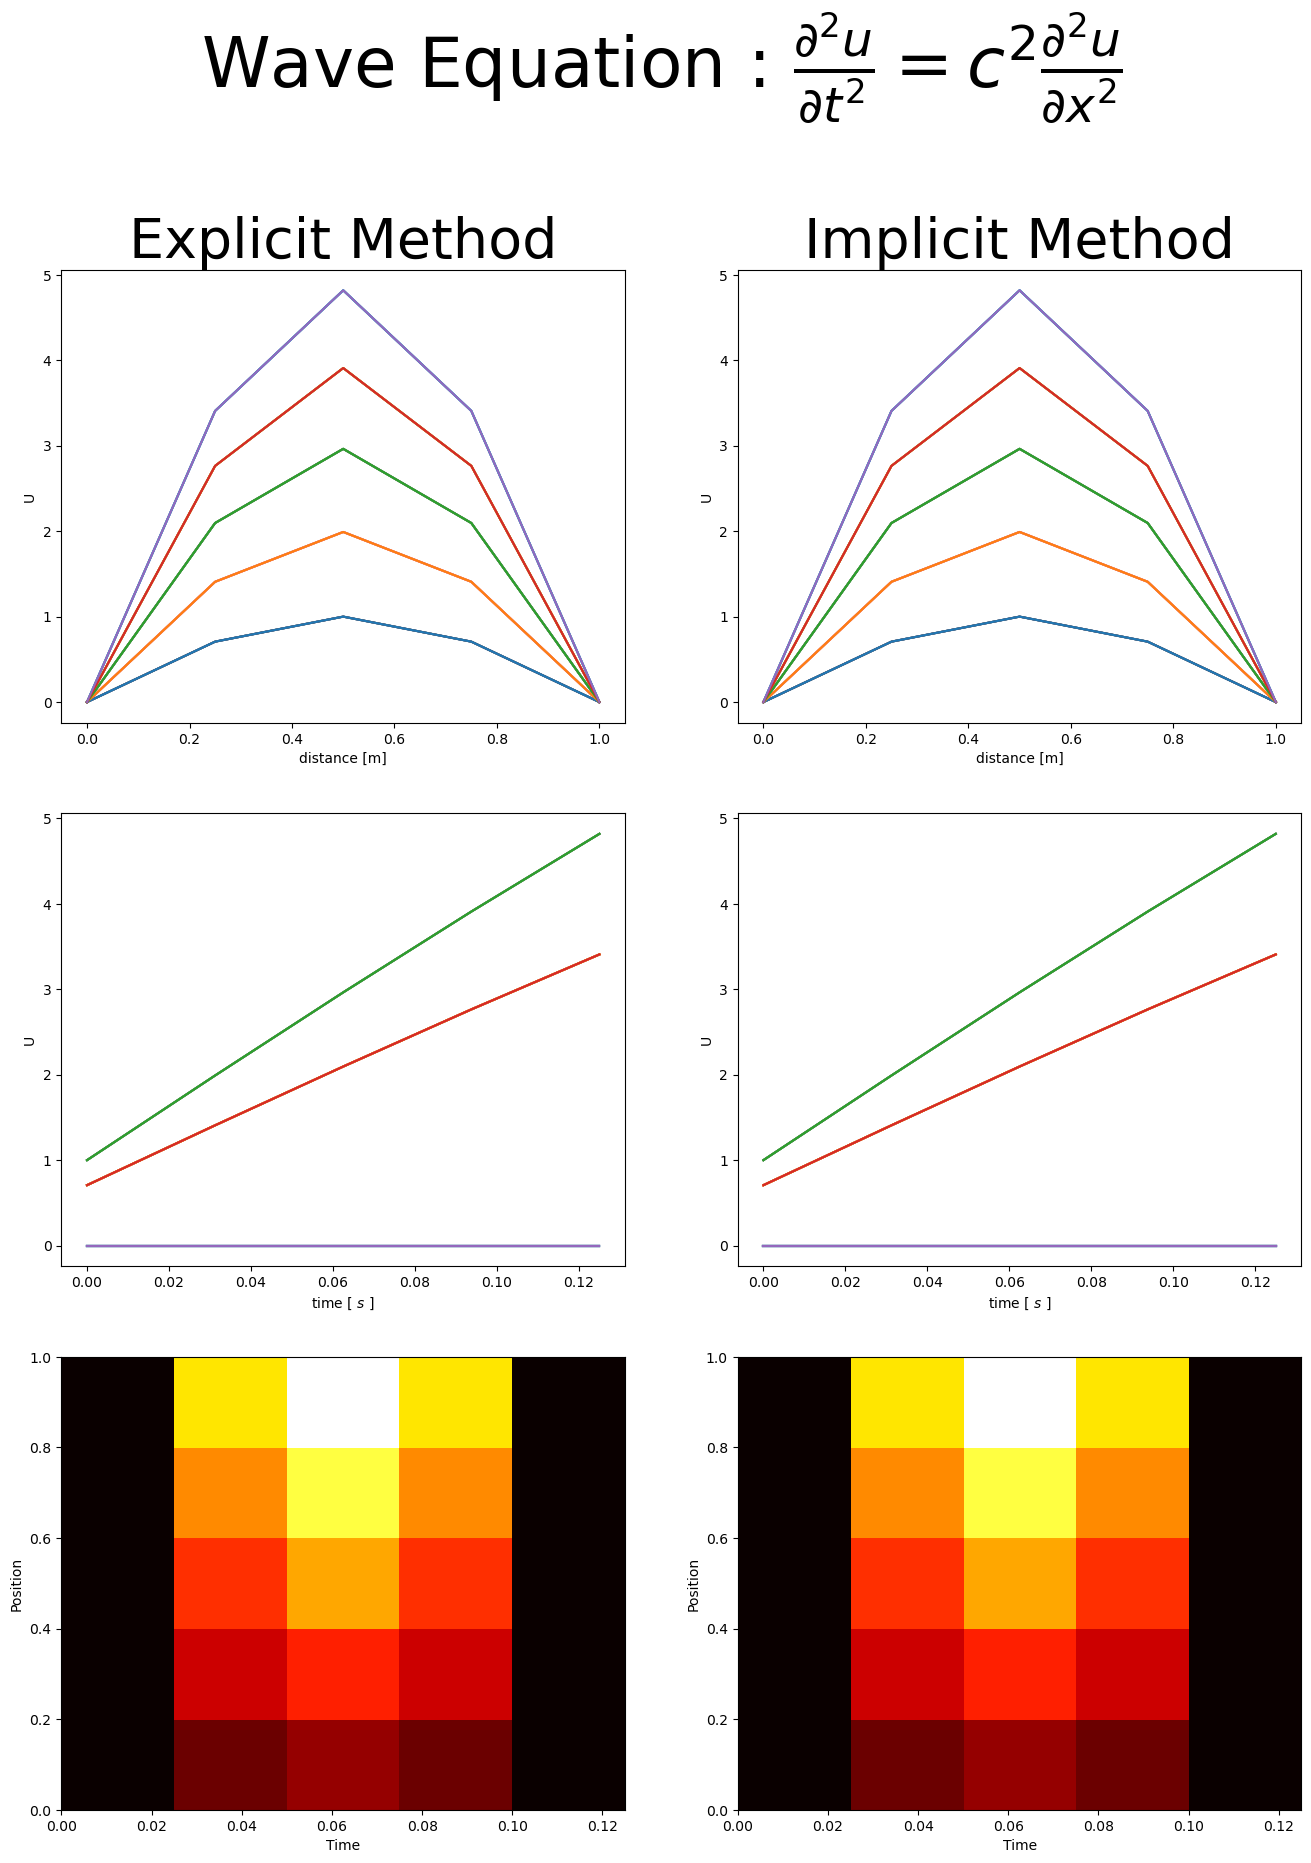

In [5]:
h=0.25
k=0.03125
a=1
b=0.1
c=1
A,B=0,0
x=np.arange(0,a+h,h)
t=np.arange(0,b+k,k)
boundaryConditions=[A,B]
initialConditions=np.sin(np.pi*x)

EW=Explicit_wave(wave_eqn,c,h,k,x,t,boundaryConditions,initialConditions)
IW=Implicit_wave(wave_eqn,c,h,k,x,t,boundaryConditions,initialConditions)

display(Math(r'T_{explicit} = '+latex(Matrix(EW.round(3)))))
display(Math(r'T_{implicit} = '+latex(Matrix(IW.round(3)))))

fig=plt.figure(figsize=(16,20))
gs=fig.add_gridspec(3,2)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[1,0])
ax4=fig.add_subplot(gs[1,1])
ax5=fig.add_subplot(gs[2,0])
ax6=fig.add_subplot(gs[2,1])
fig.suptitle('Wave Equation :\t'+\
             r'$ \frac{ \partial^2 u}{\partial t^2}= c^2 \frac{\partial^2 u}{\partial x^2}$',
             fontsize=50,y=1.01)
for j in range(len(t)):
    ax1.plot(x,EW)
    ax2.plot(x,IW)
ax1.set_xlabel('distance [m]')
ax1.set_ylabel(r'U')
ax1.set_title('Explicit Method',fontsize=40)
ax2.set_xlabel('distance [m]')
ax2.set_ylabel(r'U')
ax2.set_title('Implicit Method',fontsize=40)
'''
ax1.legend([f't = {values} s' for values in t],loc='upper right',
           bbox_to_anchor=(0.5, -0.19),fancybox=True, shadow=False, fontsize=14)
ax2.legend([f't = {values} s' for values in t],loc='upper right',
           bbox_to_anchor=(0.5, -0.19),fancybox=True, shadow=False, fontsize=14)
'''
for i in range(len(x)):
    ax3.plot(t,EW.T)
    ax4.plot(t,IW.T)
ax3.set_xlabel('time [ $s$ ]')
ax3.set_ylabel(r'U')
ax4.set_xlabel('time [ $s$ ]')
ax4.set_ylabel(r'U')
'''
ax3.legend([f'x = {values} m' for values in x],loc='upper right',
           bbox_to_anchor=(0.5, -0.19),fancybox=True, shadow=False, fontsize=14)
ax4.legend([f'x = {values} m' for values in x],loc='upper right',
           bbox_to_anchor=(0.5, -0.19),fancybox=True, shadow=False, fontsize=14)
'''
ax5.imshow(EW.T, cmap='hot', origin='lower',extent=[0, t[-1], 0, x[-1]], aspect='auto')
ax6.imshow(IW.T, cmap='hot', origin='lower',extent=[0, t[-1], 0, x[-1]], aspect='auto')
ax5.set_xlabel('Time')
ax5.set_ylabel('Position')
ax6.set_xlabel('Time')
ax6.set_ylabel('Position')
plt.show()

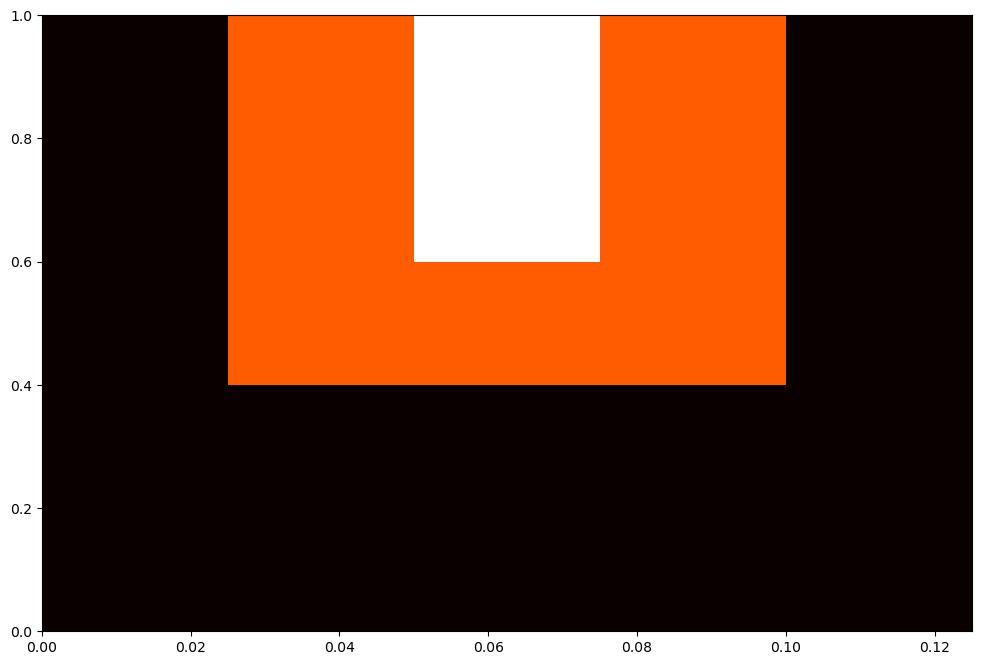

In [6]:
plt.imshow(np.abs(EW.T - IW.T), cmap='hot', origin='lower',extent=[0, t[-1], 0, x[-1]], aspect='auto')

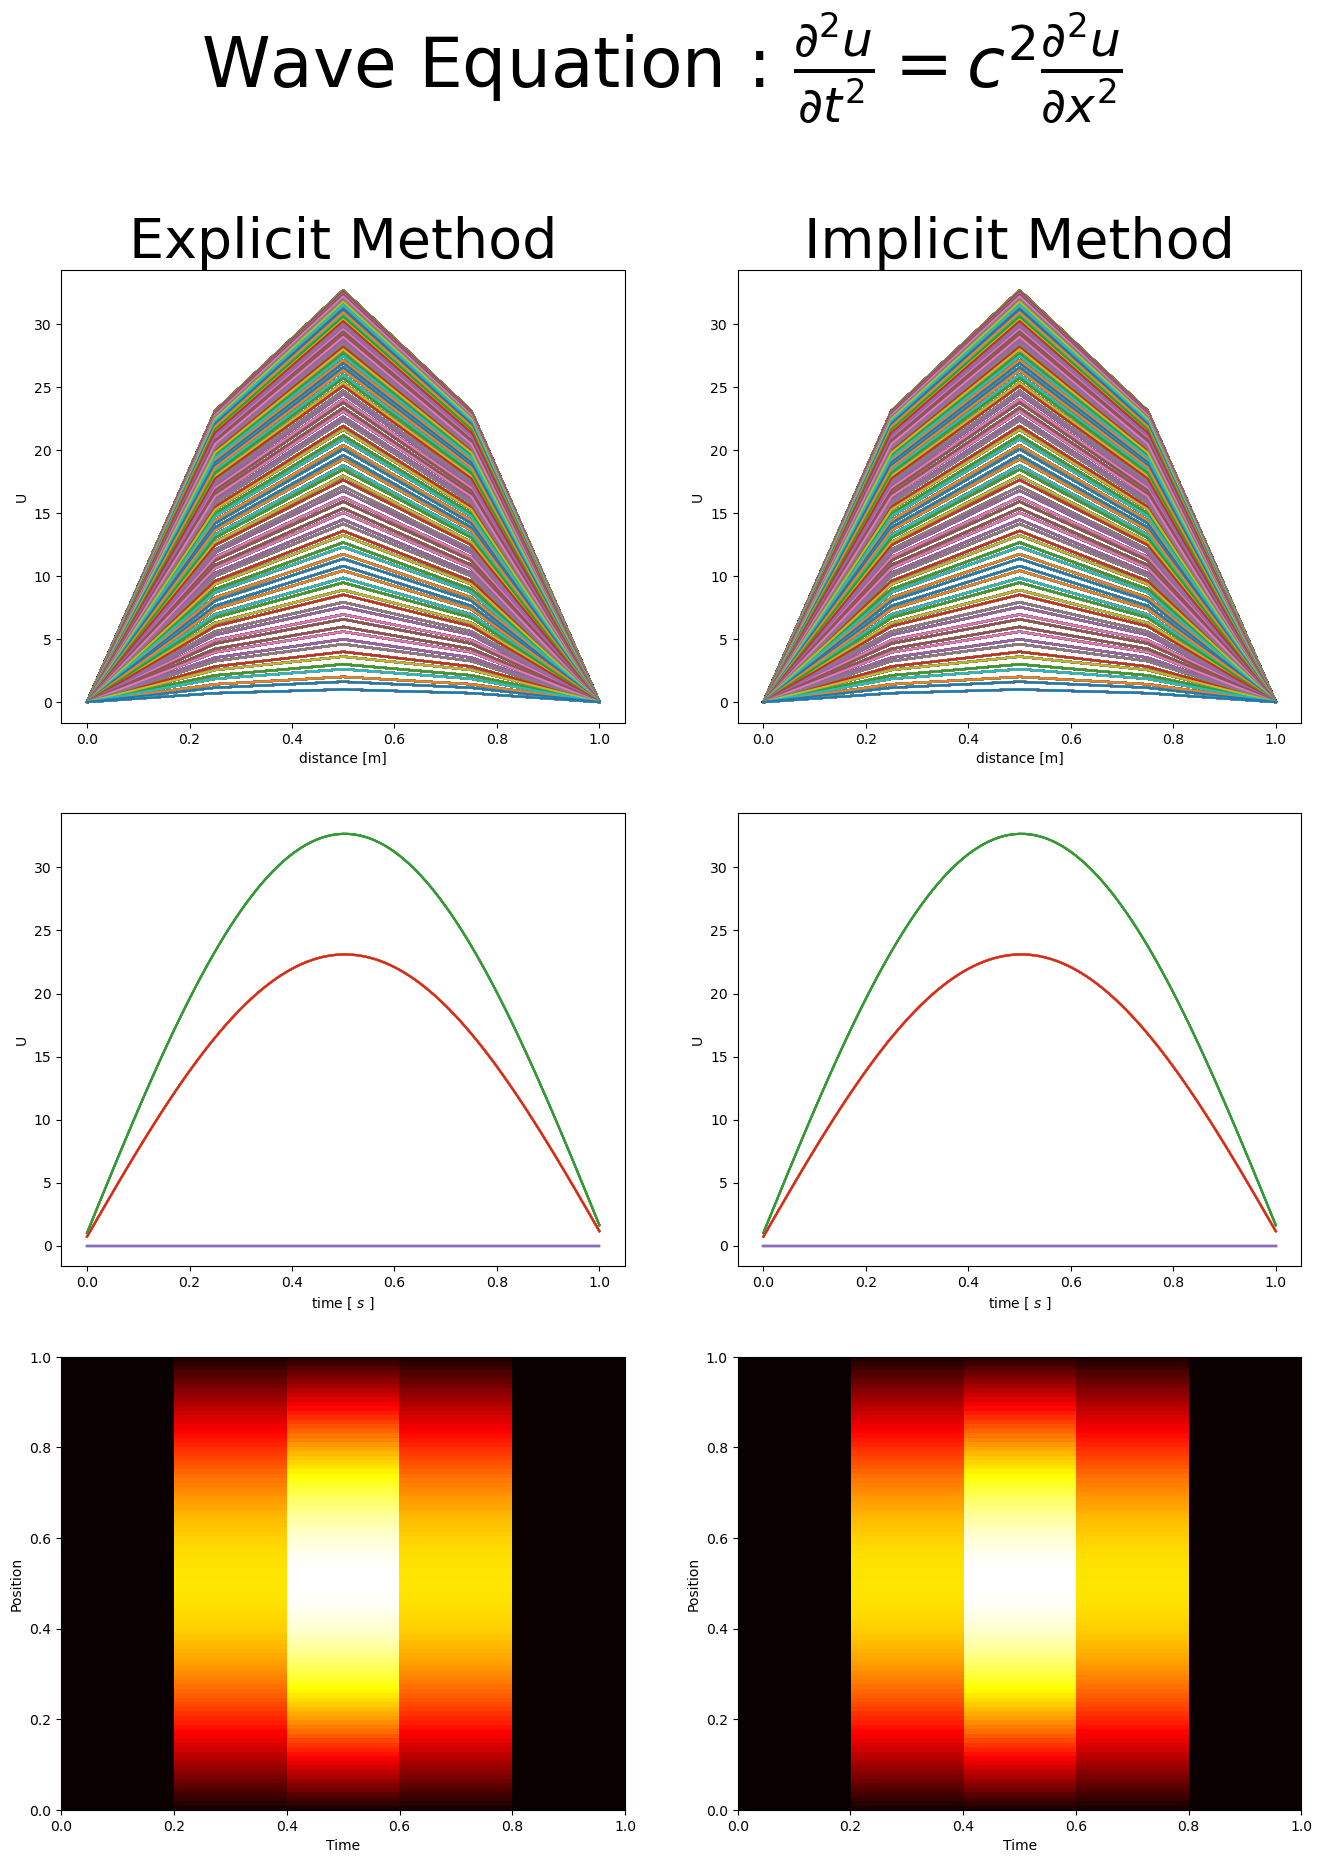

In [7]:
h=0.25
k=0.01
a=1
b=1
c=1
A,B=0,0
x=np.arange(0,a+h,h)
t=np.arange(0,b+k,k)
boundaryConditions=[A,B]
initialConditions=np.sin(np.pi*x)

EW=Explicit_wave(wave_eqn,c,h,k,x,t,boundaryConditions,initialConditions)
IW=Implicit_wave(wave_eqn,c,h,k,x,t,boundaryConditions,initialConditions)

#display(Math(r'T_{explicit} = '+latex(Matrix(EW.round(3)))))
#display(Math(r'T_{implicit} = '+latex(Matrix(IW.round(3)))))

fig=plt.figure(figsize=(16,20))
gs=fig.add_gridspec(3,2)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[1,0])
ax4=fig.add_subplot(gs[1,1])
ax5=fig.add_subplot(gs[2,0])
ax6=fig.add_subplot(gs[2,1])
fig.suptitle('Wave Equation :\t'+\
             r'$ \frac{ \partial^2 u}{\partial t^2}= c^2 \frac{\partial^2 u}{\partial x^2}$',
             fontsize=50,y=1.01)
for j in range(len(t)):
    ax1.plot(x,EW)
    ax2.plot(x,IW)
ax1.set_xlabel('distance [m]')
ax1.set_ylabel(r'U')
ax1.set_title('Explicit Method',fontsize=40)
ax2.set_xlabel('distance [m]')
ax2.set_ylabel(r'U')
ax2.set_title('Implicit Method',fontsize=40)
'''
ax1.legend([f't = {values} s' for values in t],loc='upper right',
           bbox_to_anchor=(0.5, -0.19),fancybox=True, shadow=False, fontsize=14)
ax2.legend([f't = {values} s' for values in t],loc='upper right',
           bbox_to_anchor=(0.5, -0.19),fancybox=True, shadow=False, fontsize=14)
'''
for i in range(len(x)):
    ax3.plot(t,EW.T)
    ax4.plot(t,IW.T)
ax3.set_xlabel('time [ $s$ ]')
ax3.set_ylabel(r'U')
ax4.set_xlabel('time [ $s$ ]')
ax4.set_ylabel(r'U')
'''
ax3.legend([f'x = {values} m' for values in x],loc='upper right',
           bbox_to_anchor=(0.5, -0.19),fancybox=True, shadow=False, fontsize=14)
ax4.legend([f'x = {values} m' for values in x],loc='upper right',
           bbox_to_anchor=(0.5, -0.19),fancybox=True, shadow=False, fontsize=14)
'''
ax5.imshow(EW.T, cmap='hot', origin='lower',extent=[0, t[-1], 0, x[-1]], aspect='auto')
ax6.imshow(IW.T, cmap='hot', origin='lower',extent=[0, t[-1], 0, x[-1]], aspect='auto')
ax5.set_xlabel('Time')
ax5.set_ylabel('Position')
ax6.set_xlabel('Time')
ax6.set_ylabel('Position')
plt.show()